<a href="https://colab.research.google.com/github/shanvinluo/SIR/blob/main/SIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Shanvin Luo 

March 10th, 2022

## *Introduction*
In this report, we will analyze the SIR model which is a mathematical description of the spread of a disease through the variables of people who are suspectible, infected or recovered from the disease. We will also see how the introduction of new variables/modifications can affect the SIR model. In the modified SIR model with these new modifications that we will compare with our base SIR model, we will add the two new variables of immunisation against the disease as some people have natural resistance against the disease as soon as they are born or develop in their lifetime and also deaths. The death variable is very important and relevant because not everyone who contracts the disease can always recover and some lose their lives due to it. 

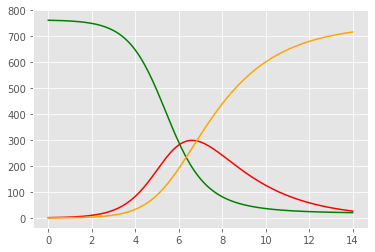

In [ ]:
#Import useful libraries
import math
import matplotlib.pyplot as plt

#Gray background and gridlines plot
plt.style.use('ggplot')

#Constants:
DT = 0.1
T_MAX = 14
STEPS = int(T_MAX/DT)
beta=0.00218
MU=0.4404


#Initial Conditions:
S_0=762
I_0=1
R_0=0


#List
t=[0,]
S=[S_0,]
I=[I_0,]
R=[R_0,]



#Main loop
for i in range(STEPS):
  t.append(t[i]+DT)
  S.append(S[i]-beta*S[i]*I[i]*DT)
  I.append(I[i]+(beta*S[i]*I[i]-MU*I[i])*DT)
  R.append(R[i]+MU*I[i]*DT)

#Scatter plot
plt.plot(t,I,c="red")
plt.plot(t,S, c="green")
plt.plot(t,R,c="orange")



## Modification to MODEL 1: Death and Immunity

The graphical model shown in the image below shows how we are modelling:


*   Death: A certain percentage (gamma) of people from the `I`nfected category will end up in the `D`eath Category instead of `R`ecovering. 
*   Immunity: A certain proportion of `S`usecptible people are unaffected by the disease as they are immune against it. Due to this immunisation of these people, they bypass the `I`nfected category and end up directly in the `R`ecovered category at a rate of alpha. 



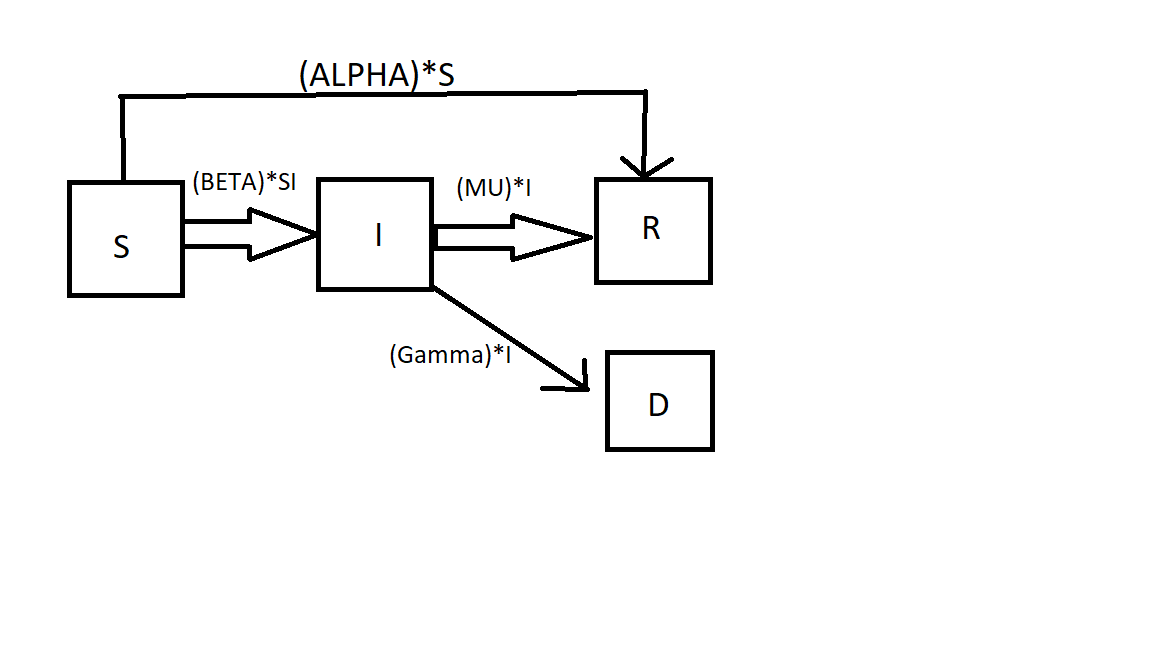

The differential equations governing this graphical model are:

$\frac{dS}{dt}=-βSI-\alpha S$

$\frac{dI}{dt}= βSI-\gamma I-\upsilon I$

$\frac{dR}{dt}= \upsilon I+ \alpha S$

$\frac{dD}{dt}= \gamma I$


The Euler method update equations become:

$ S_{i+i}=S_i+(-βS_iI_i-\alpha S_i)*dt $

$I_{i+i}=I_i+(βSI-\gamma I-\upsilon I)*dt $

$ R_{i+1} =  R_i + (\upsilon I+ \alpha S)*dt $

$ D_{i+1} = D_i + (\gamma I)*dt $

## Formula Explanation

We have two new variables that comes to modify our base model of the disease: The immunisation of a proportion of the population against the disease and people who die from it.

The first variable is the death variable which can be represented as a separate category from the original S, I and R categories. I modeled my disease's death rate after that of the COVID model which had a rough death percentage of roughly 1-2% of the infected people which is why the Gamma constant is 0.02. 

The second modification in the variables in our base model is the immunisation variable. Some people may already have developped resistance against the disease naturally or ever since they were born. This kind of resistance against diseases vary according to the disease which is why i randomly chose an immunisation constant rate randomly of about 35% which is why alpha is 0.35. Because some people are immune from the disease, if they were suspected of being infected, they will not become infected and will directly become "recovered" people, which is why I added alpha*infected in the R formula and substracted it from the S formula as it is a transfer. 

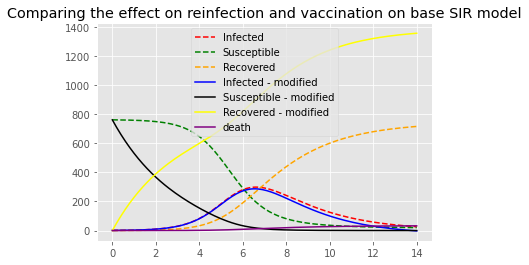

In [ ]:
# New constants
DT = 0.1
T_MAX = 14
STEPS = int(T_MAX/DT)
beta=0.00218
MU=0.4404
Gamma=0.02 #The rate of death
alpha=0.35 #The percentage of people with immunisation against the disease

# New initial conditions
D_0=0
S_0=762
I_0=1
R_0=0

# New arrays
ta=[0,]
Sa=[S_0,]
Ia=[I_0,]
Ra=[R_0,]
Da=[D_0,]

for i in range(STEPS):
    ta.append(ta[i]+DT)
    Sa.append(Sa[i]+((-beta*Sa[i]*I[i])-alpha*Sa[i])*DT)
    Ia.append(Ia[i]+(beta*S[i]*I[i]-MU*I[i]-Gamma*Ia[i])*DT)
    Ra.append(Ra[i]+(MU*I[i]+alpha*Sa[i])*DT)
    Da.append(Da[i]+(I[i]*Gamma)*DT)

#Plot base model arrays
plt.plot(t,I, label="Infected",c="red", linestyle="dashed")
plt.plot(t,S,label="Susceptible",c="green", linestyle="dashed")
plt.plot(t,R,label="Recovered",c="orange", linestyle="dashed")

#Plot modified model arrays
plt.plot(t,Ia,label="Infected - modified",c="blue",linestyle="solid")
plt.plot(t,Sa,label="Susceptible - modified",c="black",linestyle="solid")
plt.plot(t,Ra,label="Recovered - modified",c="yellow",linestyle="solid")
plt.plot(t,Da, label="death",c="purple",linestyle="solid")
plt.title("Comparing the effect on Immunisation and Death on base SIR model")
plt.legend()

## Result analysis
The modified susceptible curve of the graph has a steeper slope as well a lower number of susceptible disease carriers due to the added variable that is "Immunisation"

The modified infected curve of the graph follows roughly the same formula and shape as the base model one because the death rate isn't impactful enough to change much in curve. We can see that the modified infected curve is still slightly lower compared to its base model, even though they are roughly more than 95% similar. The factors that come to affect this are the newly added death rate and immunisation that lowers the number of infected people. 

The modified recovered curve has a larger slope and a higher curve because the immunisation factor adds more people to the recovered category. We can see the curve somehow have a rough dip in the middle, this may be due to the fact that the new death category may take some people from the recovered category.

The new curve, death is simply a curve that is proportional to the infection curve, but has a very small slope due to the death rate being very low. 

## Modification to MODEL 2: Unreliable tests

*  Unreliable tests: We discover that a certain proportion (upsilon) of people from the `I`nfected category have been wrongly tested as positive for the disease because the tests are not always reliable. The people in the `I`nfected category are thus effectively transferred back to the `S`usceptible Category instead of the `R`ecovery category. 

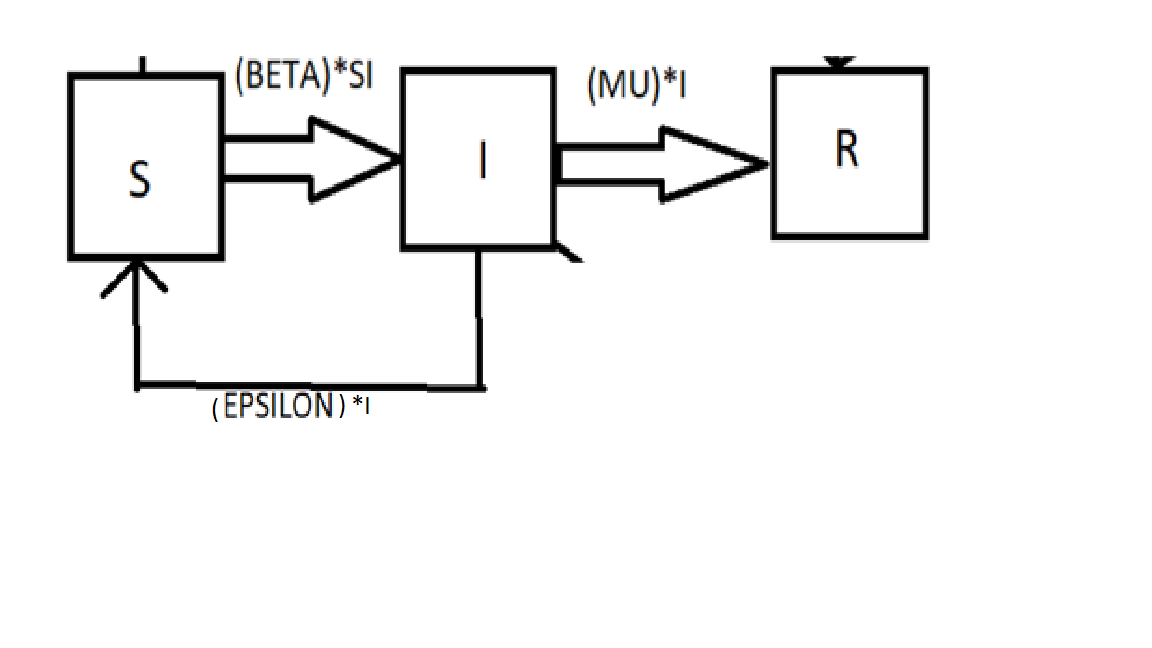

The differential equations governing this graphical model are:

$\frac{dS}{dt}=-βSI+\epsilon I$

$\frac{dI}{dt}= βSI-\upsilon\epsilon I$

$\frac{dR}{dt}= \upsilon I$



The Euler method update equations become:

$ S_{i+i}=S_i+(-βS_iI_i+\epsilon I)*dt $

$I_{i+i}=I_i+(βSI-\upsilon \epsilon I)*dt $

$ R_{i+1} =  R_i + (\upsilon I)*dt $


## Formula Explanation

We have one new variable that comes to modify our base model of the disease: The unreliability of tests
 
The Infected people who were tested wrong will be re-transferred to the Susceptible category as we do not know if they are infected of not after all. This will go according to the rate of 5% (epsilon)

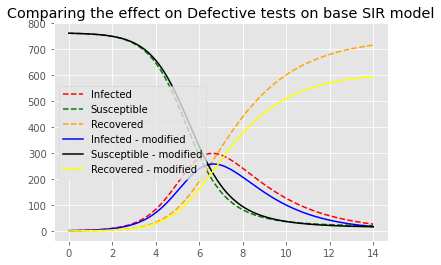

In [ ]:
#Import useful libraries
import math
import matplotlib.pyplot as plt

#Gray background and gridlines plot
plt.style.use('ggplot')

#Constants:
DT = 0.1
T_MAX = 14
STEPS = int(T_MAX/DT)
beta=0.00218
MU=0.4404
epsilon=0.05 #Percentage of defective tests (people that to have to be retested)



#Initial Conditions:
S_0=762
I_0=1
R_0=0


# New arrays
tb=[0,]
Sb=[S_0,]
Ib=[I_0,]
Rb=[R_0,]



#Main loop
for i in range(STEPS):
    tb.append(tb[i]+DT)
    Sb.append(Sb[i]-(beta*Sb[i]*Ib[i]+epsilon*Ib[i])*DT)
    Ib.append(Ib[i]+(beta*Sb[i]*Ib[i]-MU*Ib[i]-epsilon*Ib[i])*DT)
    Rb.append(Rb[i]+MU*Ib[i]*DT)

# Base Model List
t=[0,]
S=[S_0,]
I=[I_0,]
R=[R_0,]



#Base model loop
for i in range(STEPS):
  t.append(t[i]+DT)
  S.append(S[i]-beta*S[i]*I[i]*DT)
  I.append(I[i]+(beta*S[i]*I[i]-MU*I[i])*DT)
  R.append(R[i]+MU*I[i]*DT)

#Plot base model arrays
plt.plot(t,I, label="Infected",c="red", linestyle="dashed")
plt.plot(t,S,label="Susceptible",c="green", linestyle="dashed")
plt.plot(t,R,label="Recovered",c="orange", linestyle="dashed")

#Plot modified model arrays
plt.plot(tb,Ib,label="Infected - modified",c="blue",linestyle="solid")
plt.plot(tb,Sb,label="Susceptible - modified",c="black",linestyle="solid")
plt.plot(tb,Rb,label="Recovered - modified",c="yellow",linestyle="solid")
plt.title("Comparing the effect on Defective tests on base SIR model")
plt.legend()

## Result analysis
The modified susceptible curve of the graph has a less steep slope as well a higher number of susceptible disease carriers due to the added variable that is "Defective tests"

The modified infected curve is higher and has a steeper slope and a lower number of infected cases compared to the base model infected curve because due to the defective tests, there are more people that "get out" of the Infected Categgory. 

The modified recovered curve has a lower slope and a lower curve because the defective tests factor adds more people to the susceptible category, "stealing" from the recovered category.
